<a href="https://colab.research.google.com/github/GrantPennington/CS430_IndividualProject1_GTP/blob/main/CS430_Project1_GTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Grant Pennington</h3>
<h3>Machine Learning - CS430</h3>

<p>For my project I decided to use a Bank Customer Churn Dataset. The target column will be churn</p>

## Import Libraries

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [31]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CS430_Project_1_GTP/Bank Customer Churn Prediction.csv')

## Analyze Data using functions:
<ul>
<li> data.head()</li>
<li> data.describe()</li>
<li> data.info()</li>
</ul>

In [32]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## Check for missing values

In [35]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Preprocessing

In [36]:
## Drop country column because It is unimportant
data=data.drop(['customer_id'], axis=1)

In [37]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## get dummies for gender column

In [38]:
data=pd.get_dummies(data[data.columns], drop_first=True)

In [39]:
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [40]:
data.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

## Data analysis

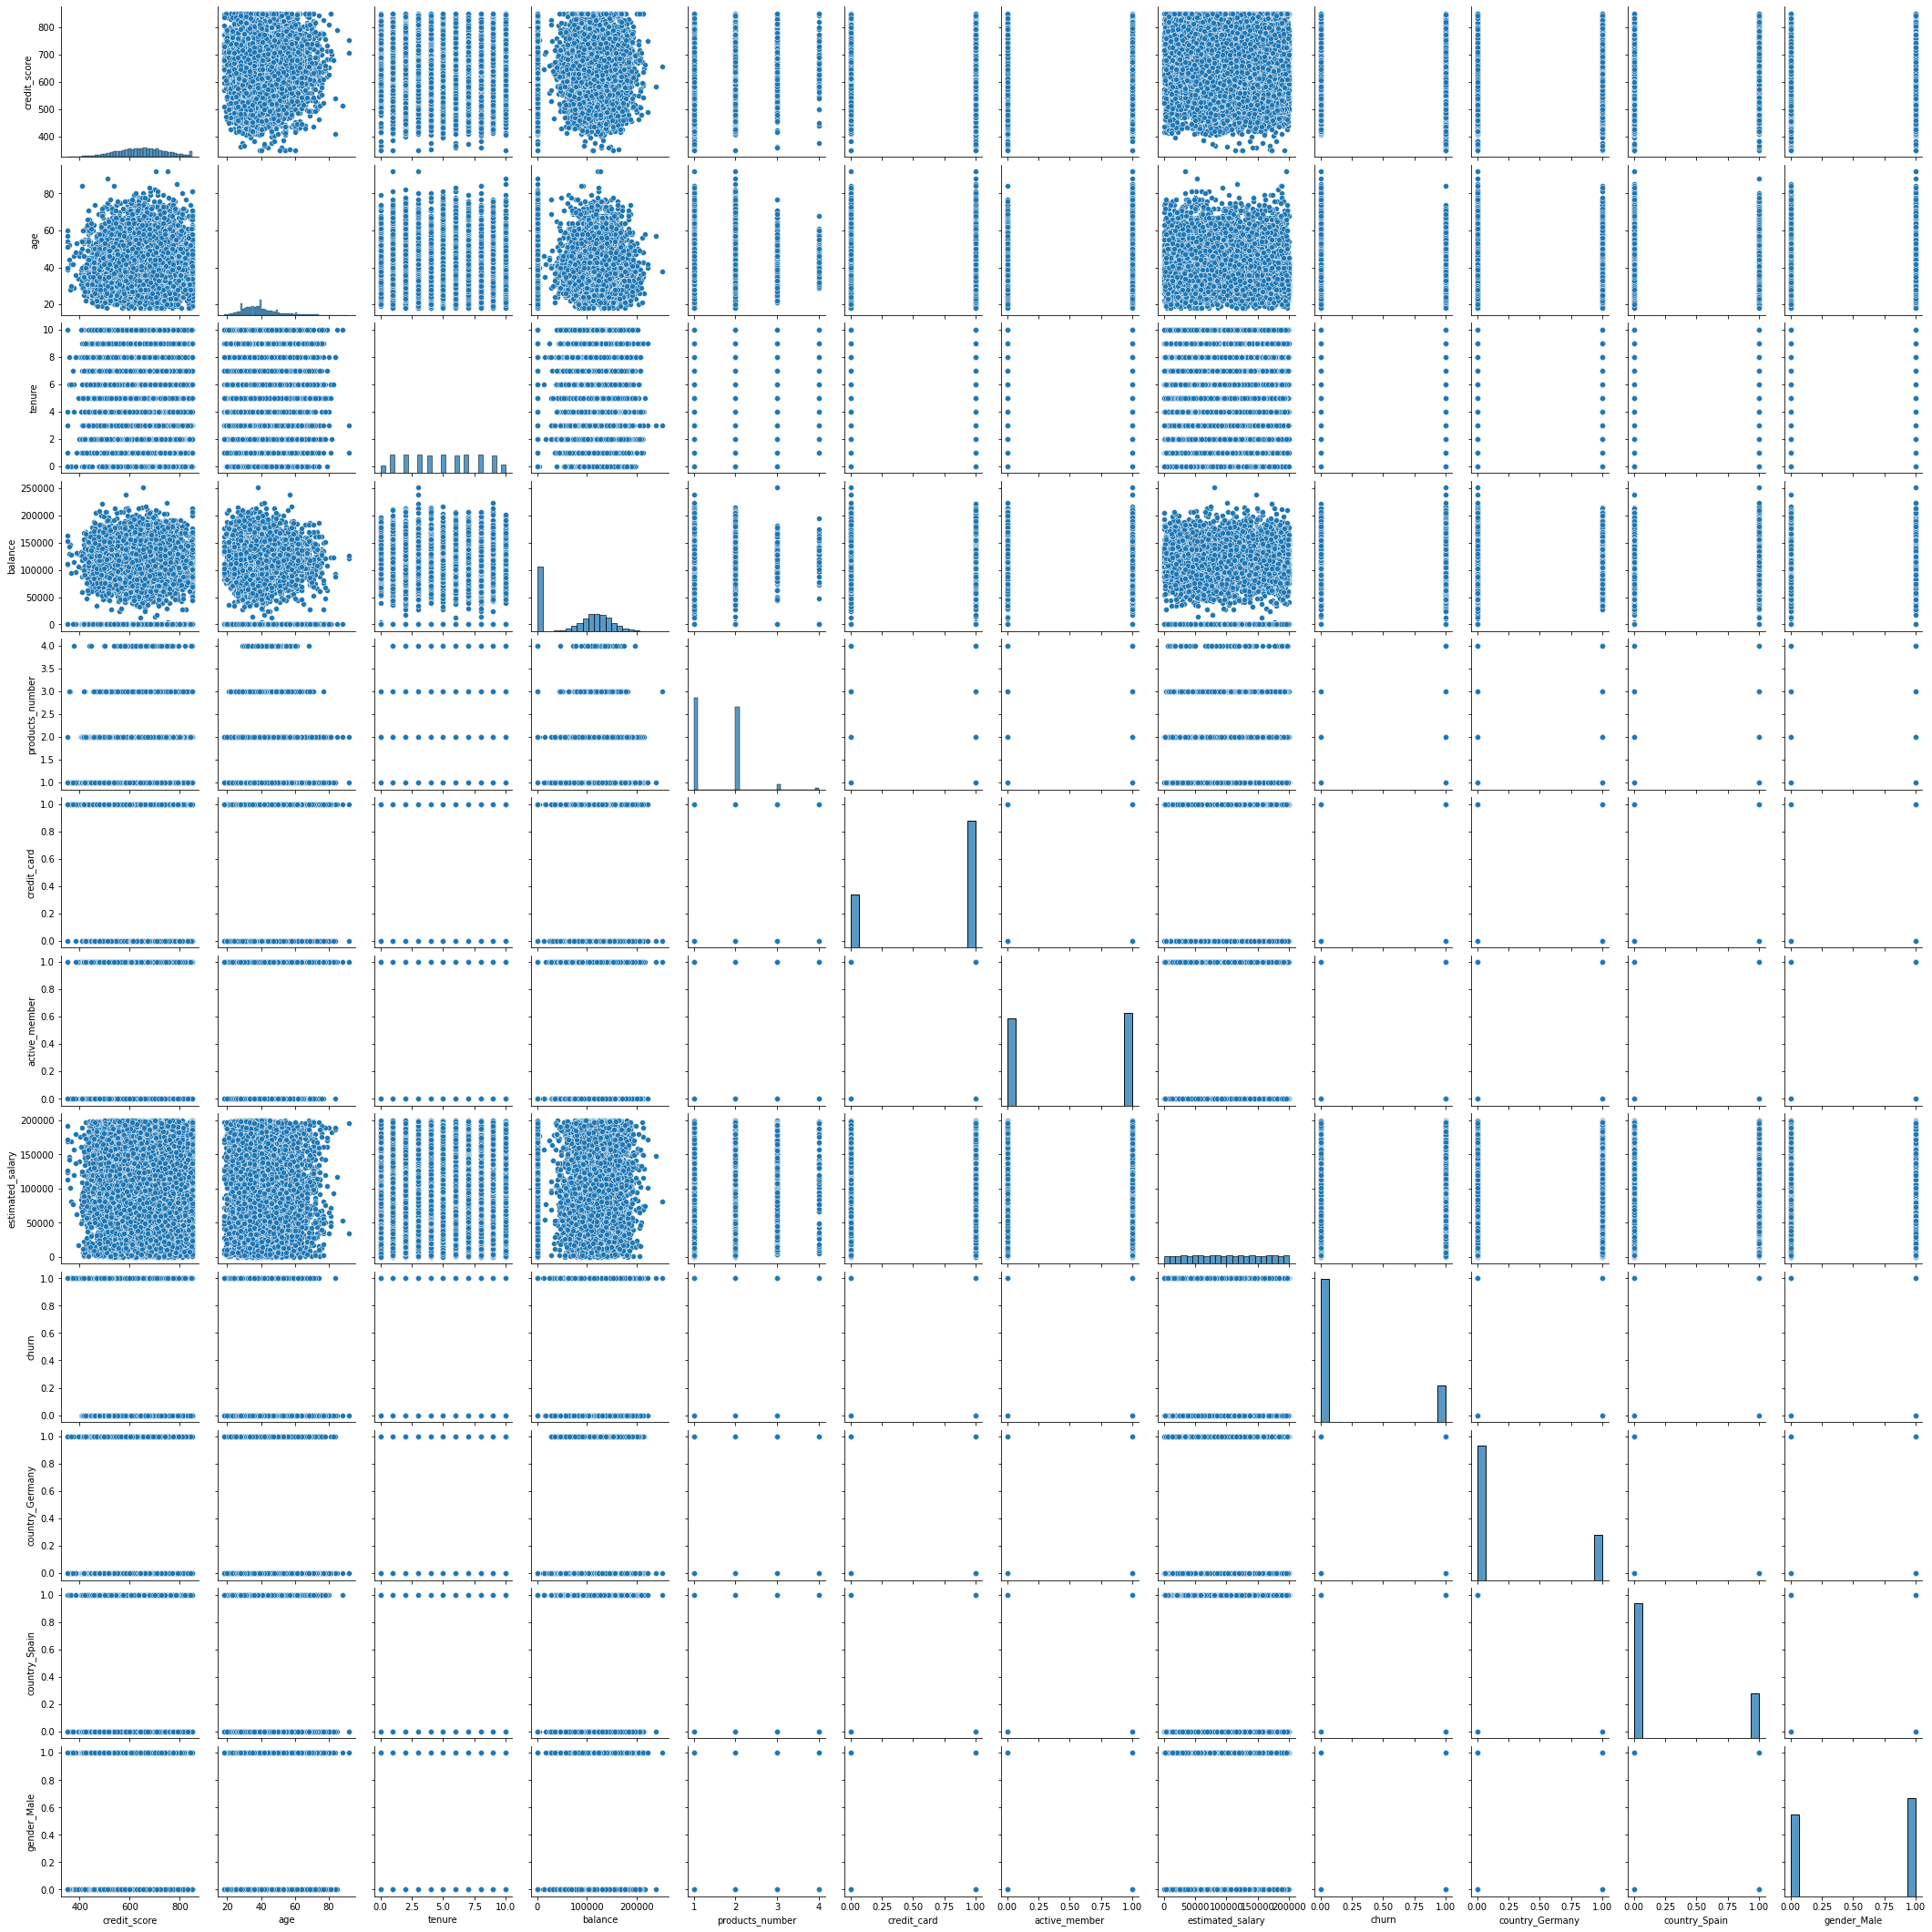

In [41]:
sns.pairplot(data=data)

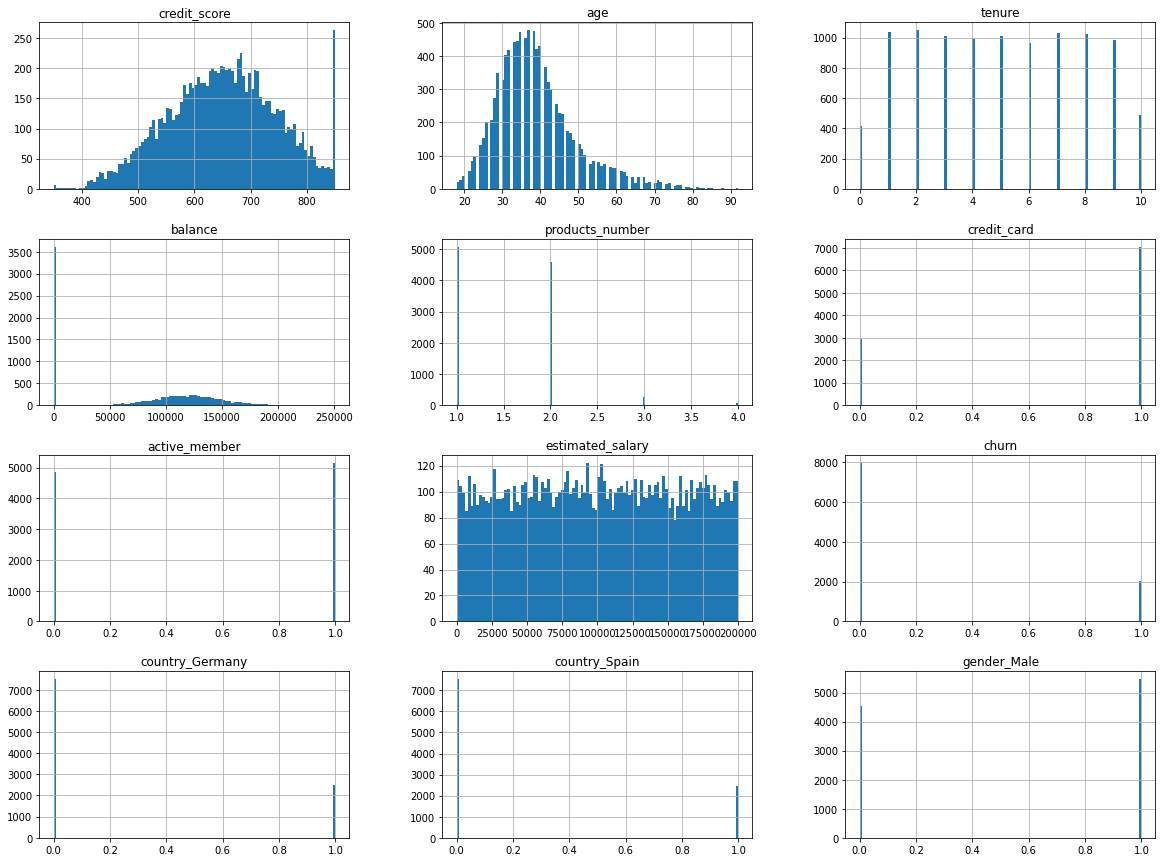

In [42]:
data.hist(bins=100, figsize=(20,15))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


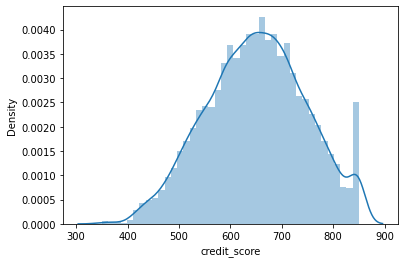

In [43]:
sns.distplot(data.credit_score)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


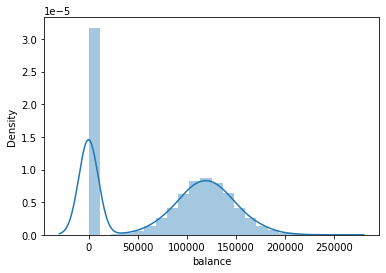

In [44]:
sns.distplot(data.balance)

## Correlation Matrix

In [45]:
data.corr()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
country_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


<h3> From the correlation matrix, we can see that age (0.285) and balance (0.119) have the highest positive correlation to churn. The highest negative correlations were active_member (-0.156) and gender_male (-0.107) </h3>
<h4> I noticed that none of the columns really have a high correlation to the target column, churn. </h4>

## Split the data

In [46]:
X=data.drop('churn', axis=1)
y=data.churn

## TRAIN TEST SPLIT

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


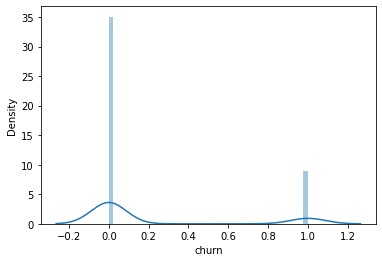

In [48]:
sns.distplot(y_test)

## Scaling the Data

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Analyze Logistic Regression, SVC, DT, and RF using Voting Classifier

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [51]:
log_clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 10000)
rnd_clf = RandomForestClassifier()
dt_gini= DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=0)
dt_entropy= DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
svm_clf = SVC(gamma = 'auto', probability = True)

In [52]:
voting_clf = VotingClassifier(estimators = [('lr', log_clf), ('rf', rnd_clf), ('dt_entropy', dt_entropy), ('dt_gini', dt_gini), ('svc', svm_clf)], voting = 'soft') # voting = 'soft'
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(max_iter=10000,
                                                 multi_class='multinomial')),
                             ('rf', RandomForestClassifier()),
                             ('dt_entropy',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     random_state=0)),
                             ('dt_gini',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=0)),
                             ('svc', SVC(gamma='auto', probability=True))],
                 voting='soft')

## Visualize and Score

In [53]:
from sklearn.metrics import accuracy_score
for clf in(log_clf, rnd_clf, svm_clf, dt_gini, dt_entropy, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.808
RandomForestClassifier 0.861
SVC 0.861
DecisionTreeClassifier 0.8375
DecisionTreeClassifier 0.8415
VotingClassifier 0.859


In [54]:
y_pred_rnd=rnd_clf.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_rnd))

[[1538   55]
 [ 223  184]]


In [56]:
print(classification_report(y_test, y_pred_rnd))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [57]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_true = y_test, y_pred = y_pred_rnd, squared=False)
print(RMSE)

0.372827037646145
